In [4]:
from datasets import load_dataset
import math

dataset = load_dataset("julep-ai/samantha-dataset-v3-prompt_response")
non_thought_dataset = dataset.filter(lambda row: not row["prompt"].endswith("<|im_start|>thought\n"))

def get_prefix(row):
    prefix = row["prompt"].split("<|im_start|>me")[-1].strip()
    return dict(prefix=prefix)

non_thought_dataset = non_thought_dataset.map(get_prefix)
non_thought_dataset = non_thought_dataset.filter(lambda row: math.ceil(len(row["prompt"])/3.6) < 5000)
prefixes = set(non_thought_dataset["train"]["prefix"])

Found cached dataset parquet (/home/diwank/.cache/huggingface/datasets/julep-ai___parquet/julep-ai--samantha-dataset-v3-prompt_response-452c7bd574ada539/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/julep-ai___parquet/julep-ai--samantha-dataset-v3-prompt_response-452c7bd574ada539/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-44b5fb3021f58d93.arrow
Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/julep-ai___parquet/julep-ai--samantha-dataset-v3-prompt_response-452c7bd574ada539/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-65cbfa99e571e901.arrow
Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/julep-ai___parquet/julep-ai--samantha-dataset-v3-prompt_response-452c7bd574ada539/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-139a916b3eb1c3bc.arrow
Loading cached processed dataset at /home/diwank/.cache/huggingface/datasets/julep-ai___parquet/julep-ai--samantha-dataset-v3-prompt_response-452c7bd574ada539/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6

Filter:   0%|          | 0/887120 [00:00<?, ? examples/s]

Filter:   0%|          | 0/156471 [00:00<?, ? examples/s]

In [5]:
len(prefixes)

220

In [6]:
prefixes

{'(AI)',
 '(Aadhya Patel)',
 '(Aari Windwalker)',
 '(Aeria Windsworn)',
 '(Aero Wingweaver)',
 '(Aloysius Fairweather)',
 '(Amara Deepwater)',
 '(Amara Earthshaker)',
 '(Amara Nwosu)',
 '(Amelia Parkins)',
 '(Amina Patel)',
 '(Argos Zephyr)',
 '(Aria Perez)',
 '(Arla the Curious Fox)',
 '(Arvias)',
 '(Asora Redcloud)',
 '(Asterion Zenith)',
 '(Astrolia Stardancer)',
 '(Aurelia Spectrum)',
 '(Ayla Featherwing)',
 '(Azura Skyward)',
 '(Baelzar, Lord of Shadows)',
 '(Balthazar the Wizard Llama)',
 '(Barrabus the Bold)',
 '(Bertie, the Curious Clockwork Owl)',
 '(Bina the Benevolent)',
 '(Bixby Grindlegear)',
 '(Blossom the Flower Sprite)',
 '(Bolgor the Techno-Merchant)',
 '(Bolivar)',
 '(Bolt)',
 '(Breezle, the Whimsical Wind Spirit)',
 '(Bubo the Celestial Owl)',
 '(Caleb McIntyre)',
 '(Captain Alya Swiftwind)',
 '(Captain Augustus Ironclaw)',
 '(Captain Cornelius)',
 '(Captain Flora)',
 '(Captain Fluffypaws)',
 '(Captain Gideon Shaw)',
 '(Captain Luna Marlowe)',
 "(Captain Moira O'Sull

In [1]:
from datasets import load_dataset

orca_mini_prompt_response = load_dataset("julep-ai/orca_minis_uncensored-prompt_response")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/74778 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8309 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /home/diwank/.cache/huggingface/datasets/julep-ai___parquet/julep-ai--orca_minis_uncensored-prompt_response-7df546bc6d6e5079/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
from transformers import LlamaTokenizerFast, AutoModelForCausalLM

llama2_model_name = "stabilityai/StableBeluga-13B"
tokenizer = LlamaTokenizerFast.from_pretrained(llama2_model_name)

In [6]:
def count_tokens(row):
    body = row["prompt"] + row["response"]
    token_count = len(tokenizer.encode(body))
    return dict(token_count=token_count)

orca_mini_prompt_response = orca_mini_prompt_response.map(count_tokens)

Map:   0%|          | 0/74778 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (8805 > 4096). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/8309 [00:00<?, ? examples/s]

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# if using a Jupyter notebook, includue:
%matplotlib inline

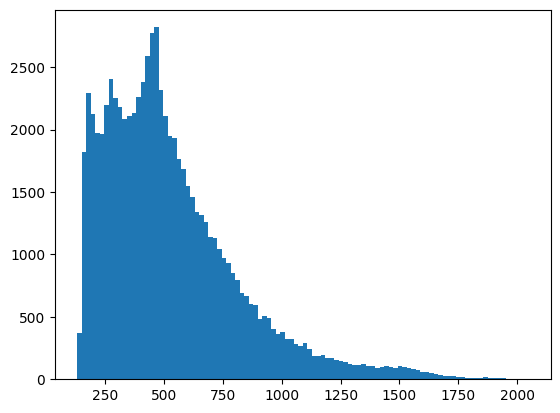

In [9]:
lens = np.array([t for t in orca_mini_prompt_response["train"]["token_count"] if t < 2048])
plt.hist(lens, 100)
plt.show()

In [11]:
orca_mini_prompt_response_2048 = orca_mini_prompt_response.filter(lambda row: row["token_count"] > 1024)
orca_mini_prompt_response_2048

Filter:   0%|          | 0/74778 [00:00<?, ? examples/s]

Filter:   0%|          | 0/8309 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['prompt', 'response', 'token_count'],
        num_rows: 5107
    })
    test: Dataset({
        features: ['prompt', 'response', 'token_count'],
        num_rows: 557
    })
})

In [12]:
orca_mini_prompt_response_2048 = orca_mini_prompt_response_2048.remove_columns(["token_count"])

In [13]:
orca_mini_prompt_response_2048.push_to_hub("julep-ai/orca_minis_uncensored-prompt_response-2048", private=True)

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]